# Week 7. Pandas 시각화

In [34]:
# %matplotlib inline
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
# #Configure Defaults
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'
# import warnings
# warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
# get_ipython().run_line_magic('matplotlib', 'inline')
# plt.rcParams['font.family']='Malgun Gothic'

In [2]:
! pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.4 MB/s eta 0:00:00


In [31]:
import pandas as pd
import numpy as np
from faker import Faker

fake = Faker('ko_KR')
Faker.seed(0); np.random.seed(0)

# 데이터 프레임 크기 설정
num_entries = 500

# 일시 데이터 생성
dates = pd.date_range(start="2001-04-01 20:21:00", periods=num_entries, freq='H')

# 이름, 시험명 데이터 생성
names = [fake.name() for _ in range(num_entries)]
exams = ['A_type', 'B_type', 'C_type', 'D_type', 'E_type']
exam_names = [np.random.choice(exams) for _ in range(num_entries)]

# 점수 데이터 생성
scores = {subject: np.random.randint(0, 101, num_entries) for subject in ['국어', '영어', '수학', '역사']}

# 출석 데이터 생성
attendance = np.random.choice([True, False], num_entries)

# 반 데이터 생성
classes = ['Class ' + str(i) for i in range(1, 6)]
class_assignments = [np.random.choice(classes) for _ in range(num_entries)]

# 데이터 프레임 생성
df = pd.DataFrame({
    'date': dates,
    'name': names,
    'Korean': scores['국어'],
    'English': scores['영어'],
    'Math': scores['수학'],
    'History': scores['역사'],
    'Exam_level': exam_names,
    'Attendance': attendance,
    'Class': class_assignments
})

df

,date,name,Korean,English,Math,History,Exam_level,Attendance,Class
0,2001-04-01 20:21:00,권영자,41,1,81,63,E_type,True,Class 5
1,2001-04-01 21:21:00,박승민,66,18,72,43,A_type,False,Class 5
2,2001-04-01 22:21:00,이예은,92,53,73,27,D_type,True,Class 2
3,2001-04-01 23:21:00,백예진,78,28,100,87,D_type,True,Class 2
4,2001-04-02 00:21:00,권우진,91,64,31,20,D_type,True,Class 1
...,...,...,...,...,...,...,...,...,...
495,2001-04-22 11:21:00,박춘자,11,88,92,61,B_type,True,Class 2
496,2001-04-22 12:21:00,이민수,16,17,14,97,D_type,False,Class 2
497,2001-04-22 13:21:00,이예진,60,68,14,44,C_type,False,Class 3
498,2001-04-22 14:21:00,윤성호,63,56,80,54,E_type,False,Class 3


In [ ]:
import pandas as pd
df = pd.read_csv('../data/시험점수.csv')
df.head()

,일자,이름,국어,영어,수학,역사,시험명,출석
0,2001-04-01 20:21:00,수철,76,81,26,71,A유형,True
1,2001-04-02 20:21:00,수철,93,48,81,84,B유형,True
2,2001-04-03 20:21:00,수철,30,64,26,84,C유형,False
3,2001-04-04 20:21:00,철수,74,72,46,65,D유형,True
4,2001-04-05 20:21:00,영희,42,26,79,91,E유형,True


<Axes: >

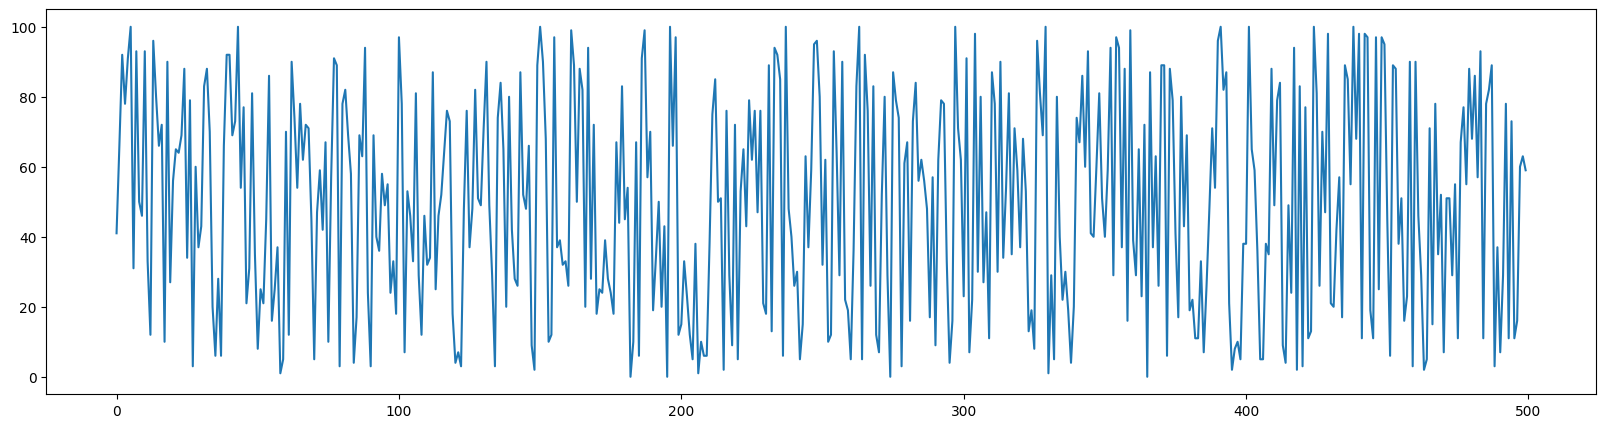

In [16]:
df['Korean'].plot(figsize=(20,5))

<Axes: title={'center': 'Line Plot'}>

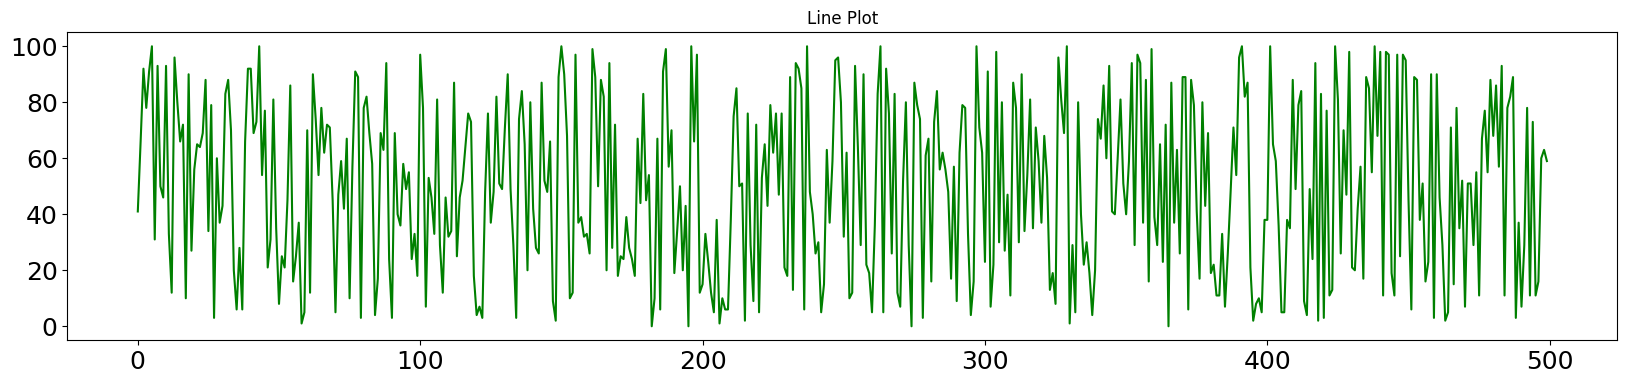

In [17]:
df['Korean'].plot(figsize=(20, 4), color='green', title = 'Line Plot', fontsize=18)

<Axes: title={'center': 'Line Plot'}>

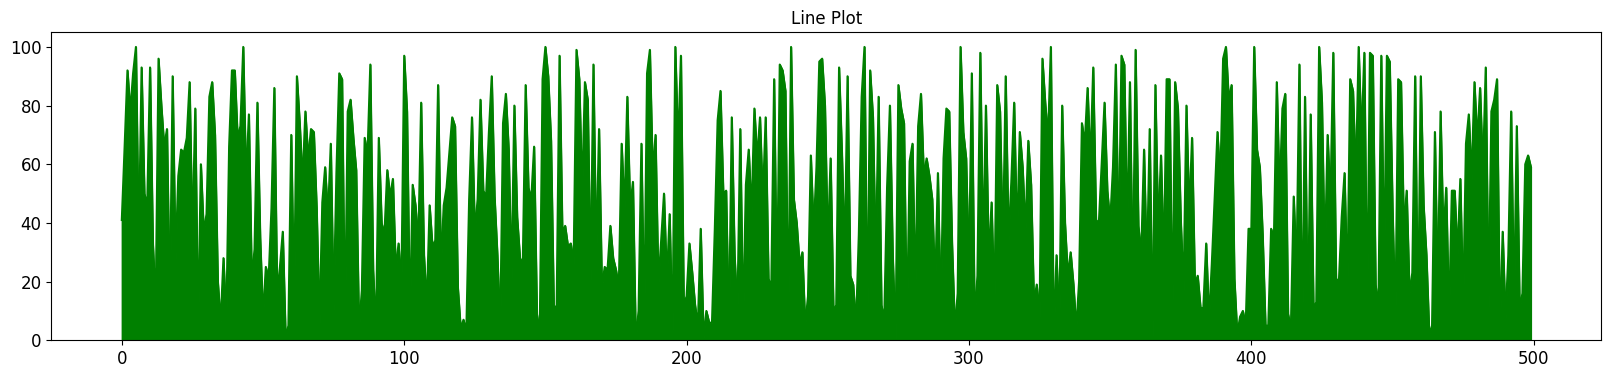

In [18]:
df['Korean'].plot(kind='area', figsize=(20, 4), color='green', title = 'Line Plot', fontsize=12)

<Axes: title={'center': 'Line Plot'}>

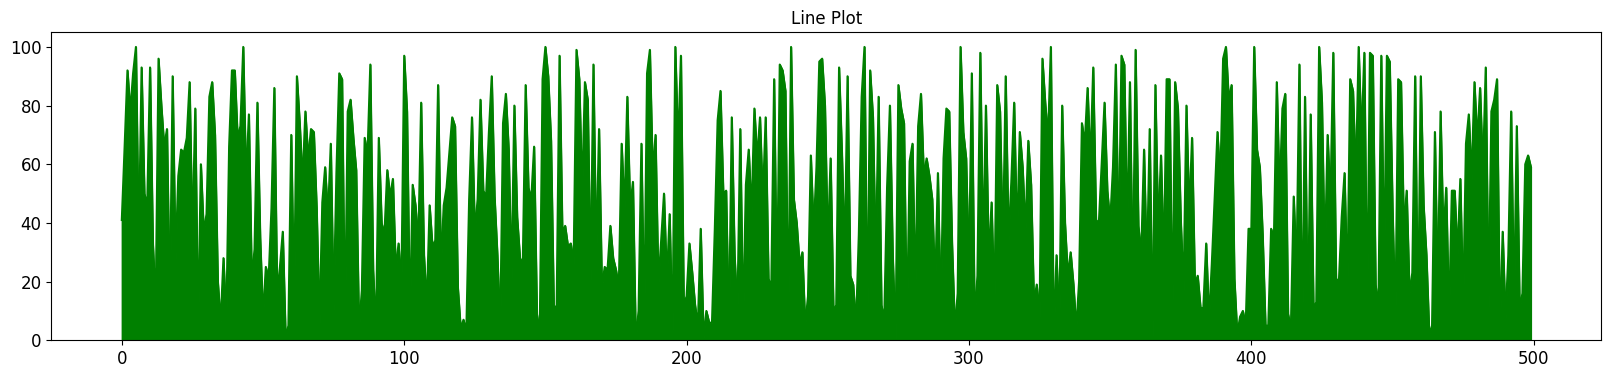

In [19]:
df['Korean'].plot.area(figsize=(20, 4), color='green', title = 'Line Plot', fontsize=12)

<Axes: title={'center': 'Area Plot'}>

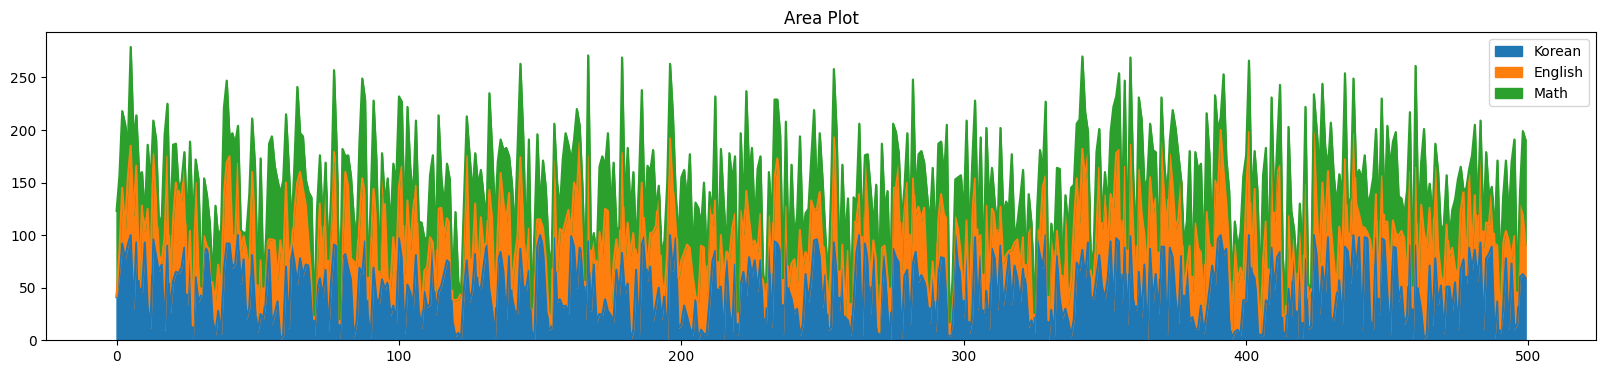

In [20]:
data = df[['Korean', 'English', 'Math']]
data.head()
data.plot.area(figsize=(20, 4), title='Area Plot')

<Axes: title={'center': 'Area Plot'}>

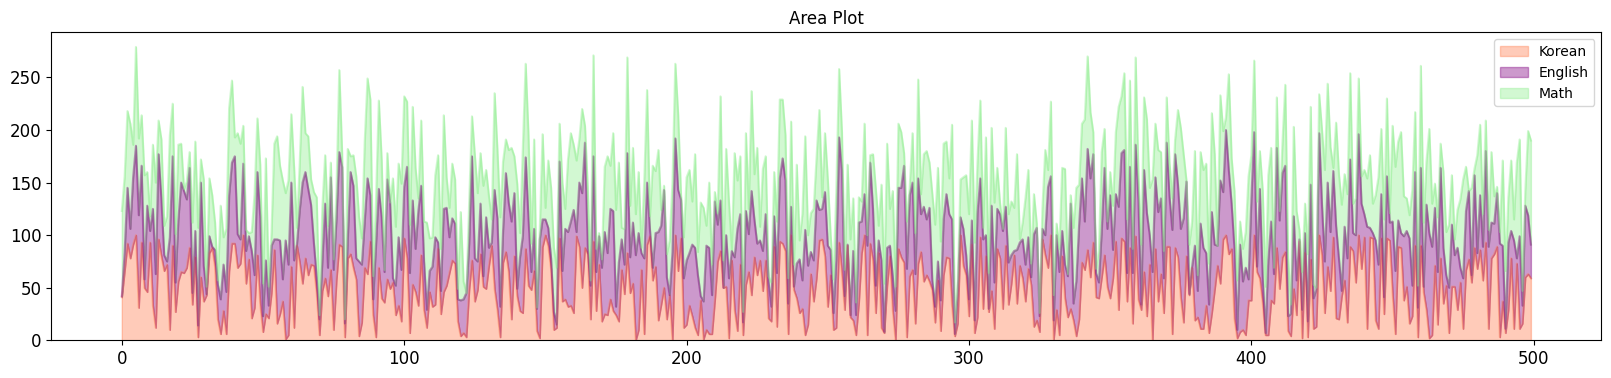

In [21]:
data.plot.area(alpha=0.4, color=['coral', 'purple', 'lightgreen'],figsize=(20,4), title='Area Plot', fontsize=12)

### pandas.plot() function can make eleven types of plots:
- line
- area
- bar
- barh
- pie
- box
- hexbin
- hist
- kde
- density
- scatter

## Histogram

<Axes: >

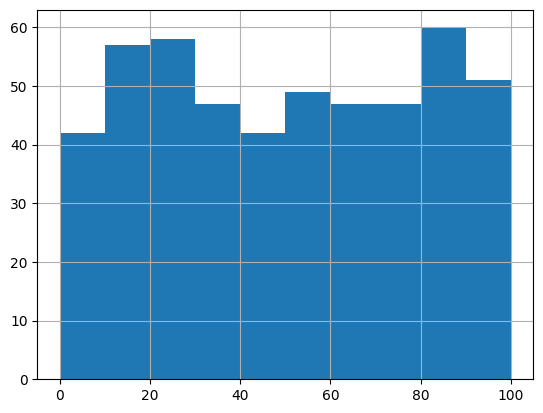

In [22]:
df['English'].hist()

<Axes: ylabel='Frequency'>

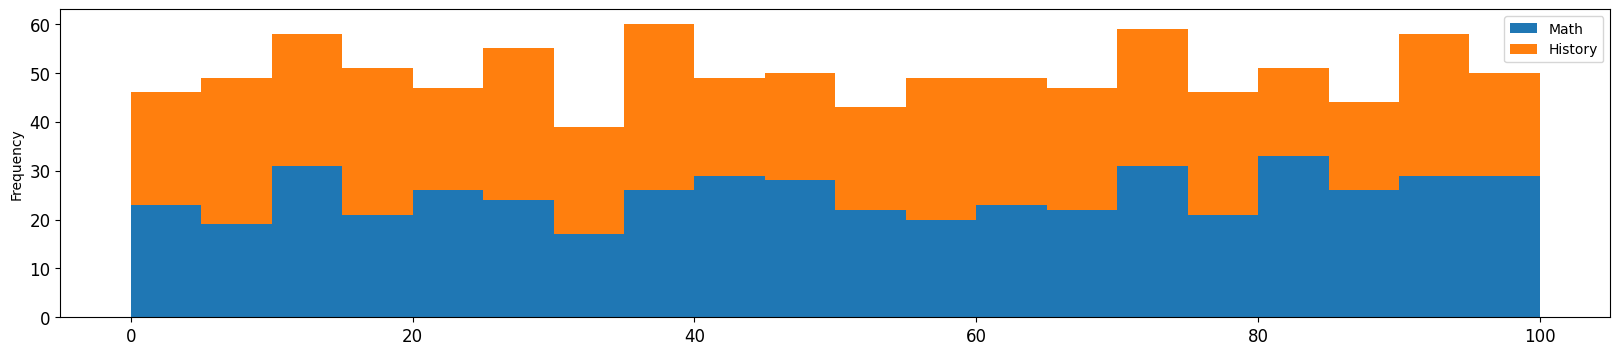

In [23]:
df[['Math', 'History']].plot.hist(stacked=True, bins=20, fontsize=12, figsize=(20, 4))

<Axes: ylabel='Frequency'>

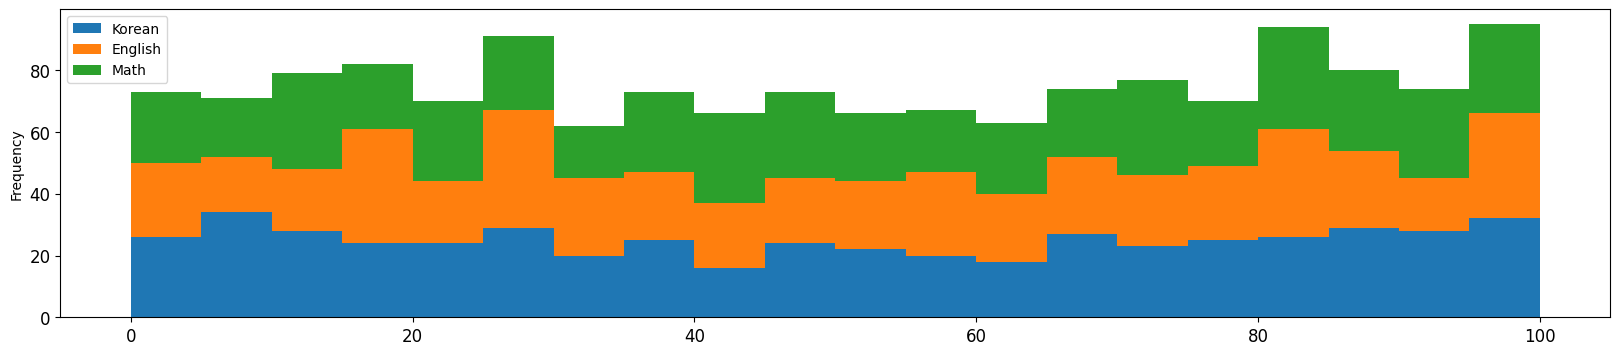

In [24]:
data.plot.hist(stacked=True, bins=20, fontsize=12, figsize=(20, 4))

array([[<Axes: title={'center': 'Korean'}>,
        <Axes: title={'center': 'English'}>],
       [<Axes: title={'center': 'Math'}>, <Axes: >]], dtype=object)

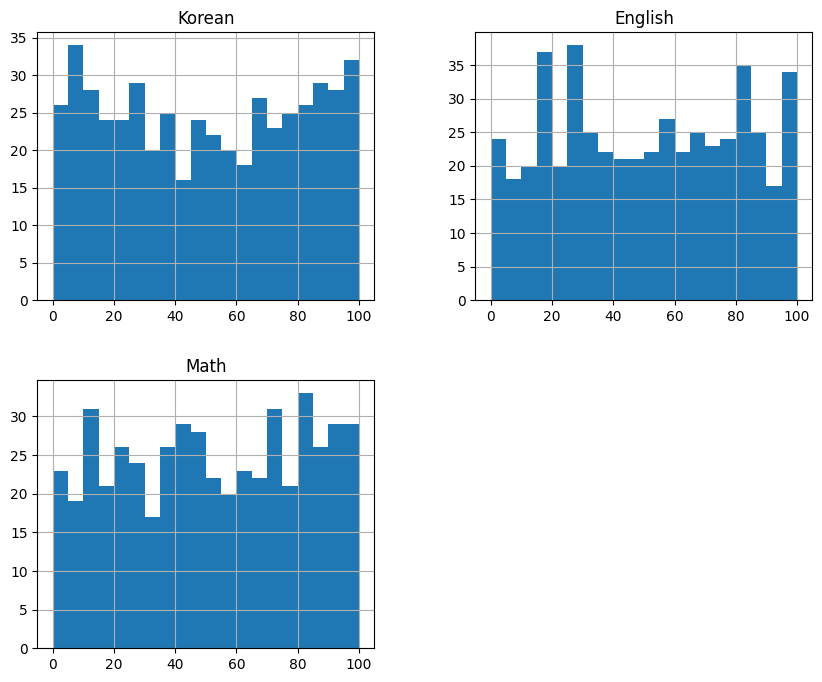

In [25]:
data.hist(bins=20,figsize=(10, 8))

In [26]:
df.head()

,date,name,Korean,English,Math,History,Eaam_level,Attendance,Class
0,2001-04-01 20:21:00,권영자,41,1,81,63,E형,True,Class 5
1,2001-04-01 21:21:00,박승민,66,18,72,43,A형,False,Class 5
2,2001-04-01 22:21:00,이예은,92,53,73,27,D형,True,Class 2
3,2001-04-01 23:21:00,백예진,78,28,100,87,D형,True,Class 2
4,2001-04-02 00:21:00,권우진,91,64,31,20,D형,True,Class 1


array([[<Axes: title={'center': 'A_type'}>,
        <Axes: title={'center': 'B_type'}>],
       [<Axes: title={'center': 'C_type'}>,
        <Axes: title={'center': 'D_type'}>],
       [<Axes: title={'center': 'E_type'}>, <Axes: >]], dtype=object)

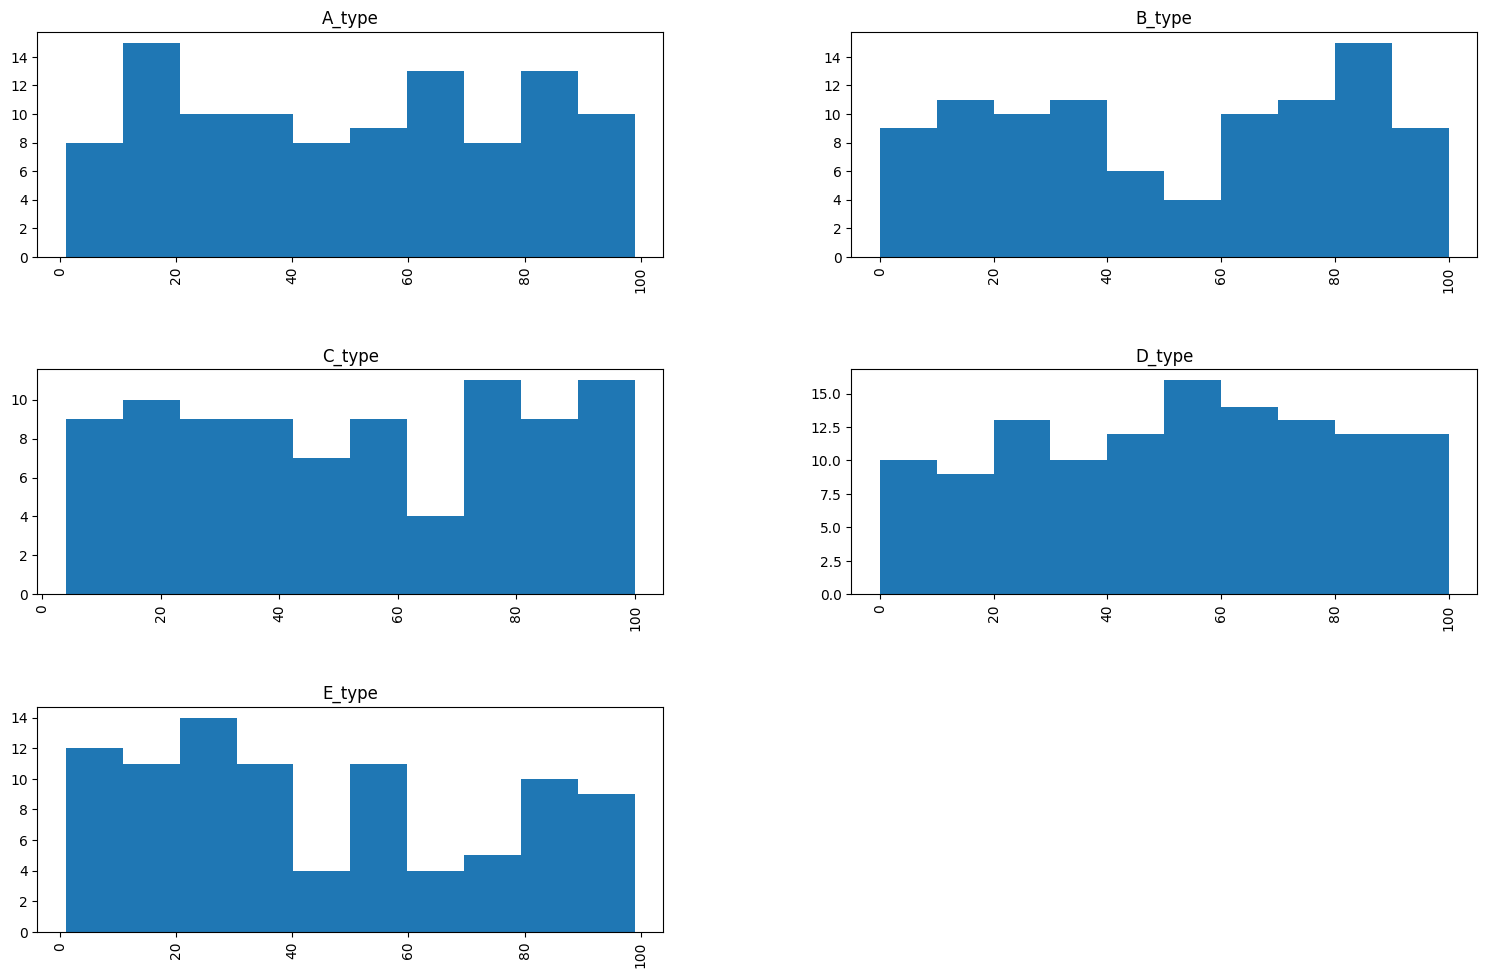

In [32]:
df[['Exam_level', 'English']].hist(by='Exam_level', figsize=(18, 12))

A_type


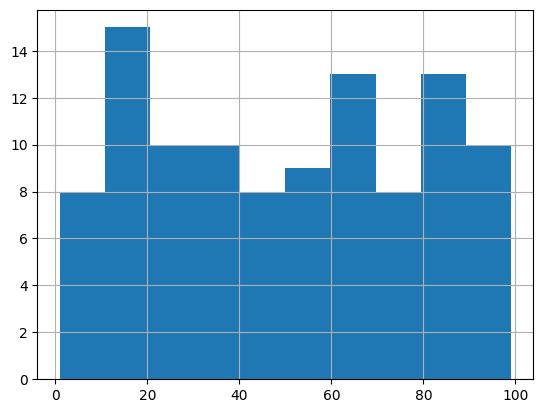

B_type


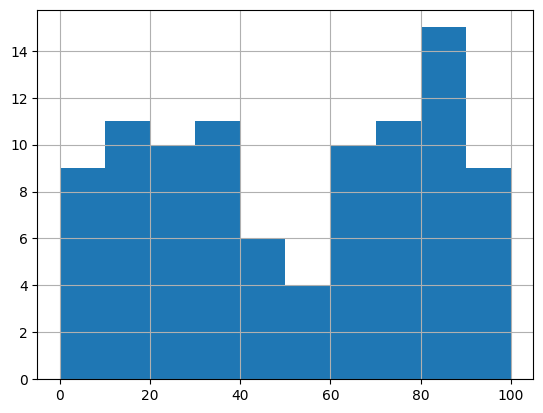

C_type


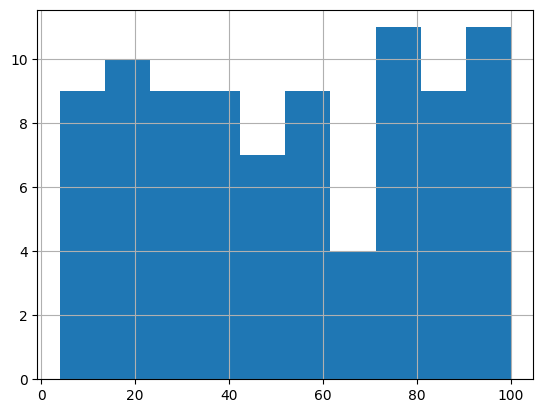

D_type


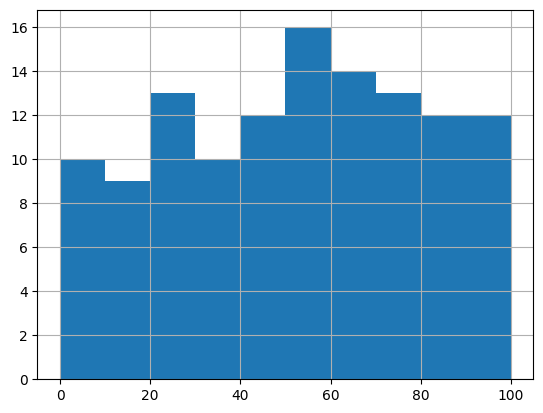

E_type


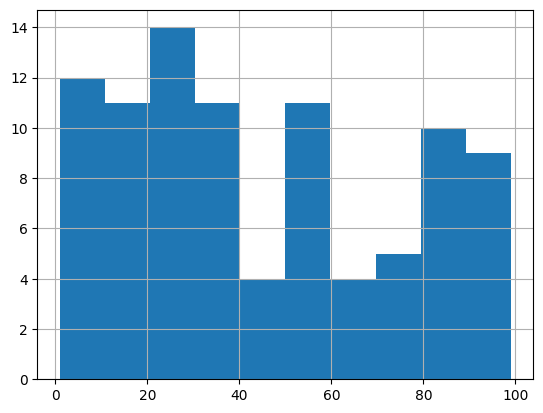

In [36]:
for i, data in df.groupby('Exam_level'):
    print(i)
    data['English'].hist(); plt.show()

## Bar Plot

<Axes: xlabel='Exam_level'>

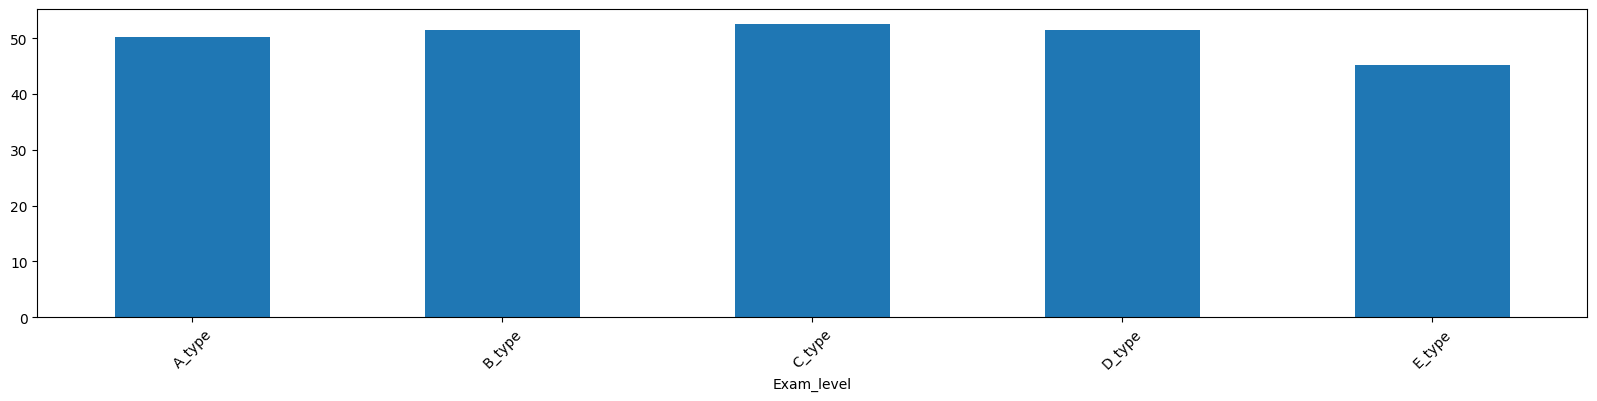

In [37]:
df.groupby('Exam_level')['English'].mean().plot(kind='bar', rot=45, fontsize=10, figsize=(20, 4))

<Axes: ylabel='Exam_level'>

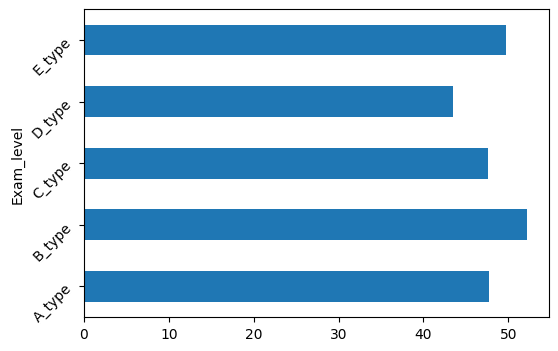

In [38]:
df.groupby('Exam_level')['History'].mean().plot(kind='barh', rot=45, fontsize=10, figsize=(6, 4))

In [40]:
df.head()

,date,name,Korean,English,Math,History,Exam_level,Attendance,Class
0,2001-04-01 20:21:00,권영자,41,1,81,63,E_type,True,Class 5
1,2001-04-01 21:21:00,박승민,66,18,72,43,A_type,False,Class 5
2,2001-04-01 22:21:00,이예은,92,53,73,27,D_type,True,Class 2
3,2001-04-01 23:21:00,백예진,78,28,100,87,D_type,True,Class 2
4,2001-04-02 00:21:00,권우진,91,64,31,20,D_type,True,Class 1


In [43]:
df.groupby('Exam_level')[['Korean', 'English', 'Math']].mean()

,Korean,English,Math
Exam_level,,,
A_type,50.788462,50.211538,53.423077
B_type,51.239583,51.458333,51.447917
C_type,47.965909,52.602273,52.715909
D_type,47.975207,51.512397,47.661157
E_type,51.065934,45.164835,52.417582


In [47]:
data = df.groupby('Exam_level')[['Korean', 'English', 'Math']].mean().reset_index()
data

,Exam_level,Korean,English,Math
0,A_type,50.788462,50.211538,53.423077
1,B_type,51.239583,51.458333,51.447917
2,C_type,47.965909,52.602273,52.715909
3,D_type,47.975207,51.512397,47.661157
4,E_type,51.065934,45.164835,52.417582


<Axes: xlabel='Exam_level'>

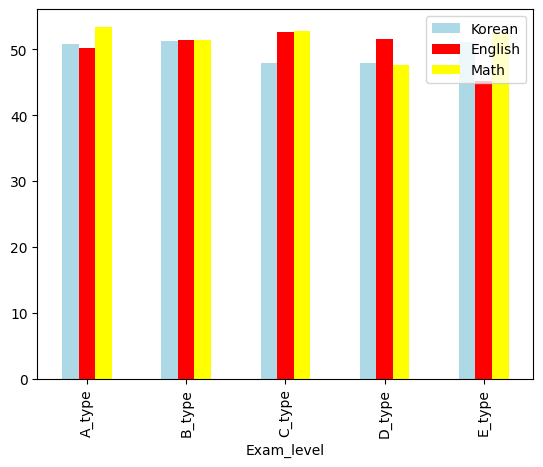

In [48]:
data.plot(x = 'Exam_level',
          y= ['Korean', 'English', 'Math'],
          kind = 'bar',
          color = ['lightblue', 'red', 'yellow'],
          fontsize=10)

<Axes: xlabel='Exam_level'>

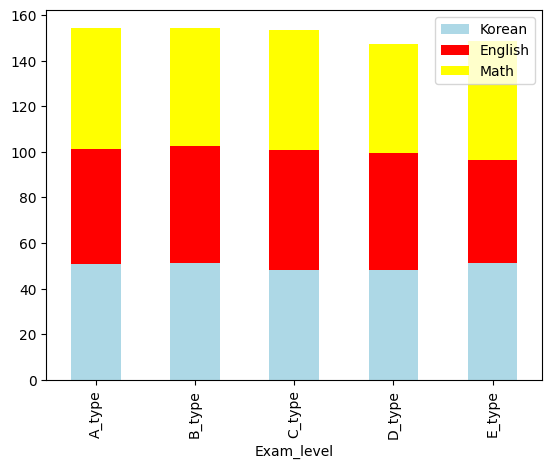

In [49]:
data.plot(x = 'Exam_level',
          y= ['Korean', 'English', 'Math'],
          kind = 'bar',
          stacked=True,
          color = ['lightblue', 'red', 'yellow'],
          fontsize=10)

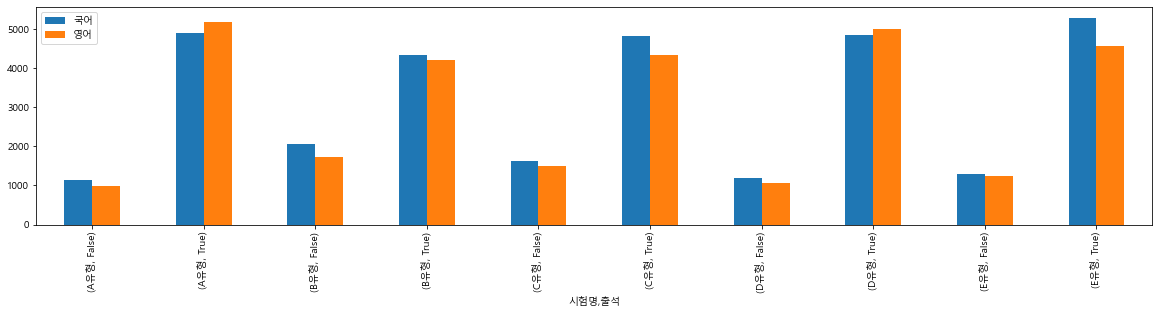

In [ ]:
df.groupby(['시험명', '출석'])['국어', '영어'].agg('sum', 'mean').plot(kind='bar', figsize=(20, 4))

## Pie Plot

In [ ]:
data = df.groupby('출석')['영어'].count()
data

출석
False    110
True     390
Name: 영어, dtype: int64

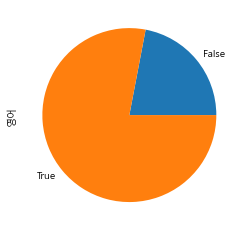

In [ ]:
ax = data.plot.pie()

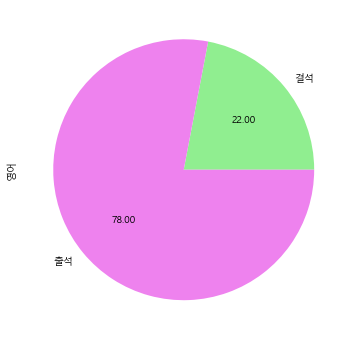

In [ ]:
ax = data.plot.pie(labels = ['결석', '출석'],
                   figsize = (8, 6),
                   colors = ['lightgreen', 'violet'],
                   autopct = '%.2f')

## Boxplot

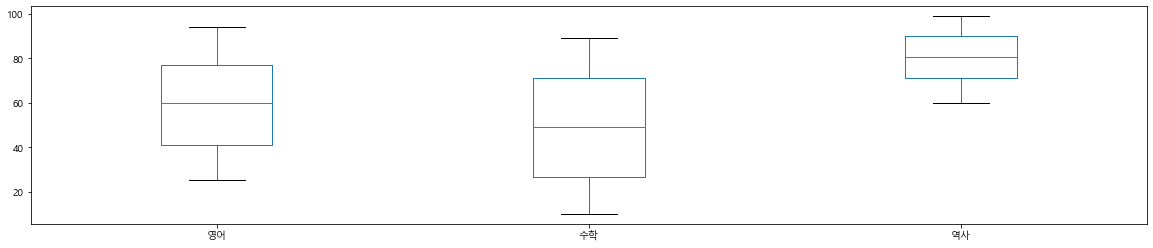

In [ ]:
#color = {'boxes': 'DarkBlue', 'whiskers': 'coral', 'medians': 'Black', 'caps': 'Green'}
df[['영어', '수학', '역사']].plot.box(figsize=(20, 4))

## Scatter Plot

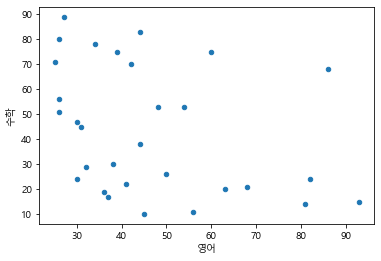

In [ ]:
df.sample(30).plot(x='영어', y= '수학', kind = 'scatter')

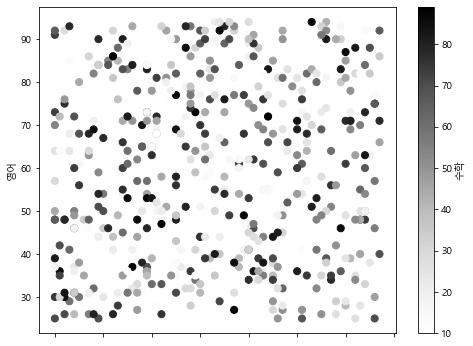

In [ ]:
df.plot.scatter(x= '국어', y = '영어', c ='수학',  s=50, figsize=(8, 6))

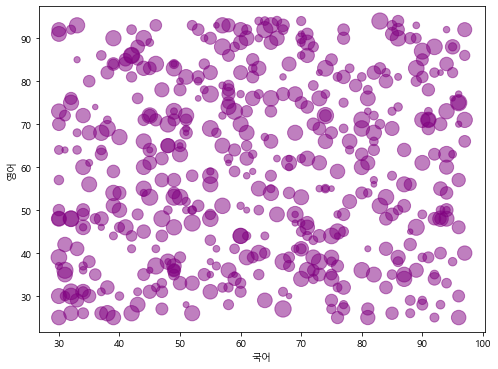

In [ ]:
df.plot.scatter(x= '국어', y = '영어',
                s =df['수학']* 3,
                alpha=0.5, color='purple',
                figsize=(8, 6))

## hexbin

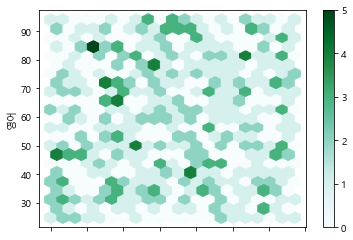

In [ ]:
df.plot.hexbin(x= '국어', y = '영어', gridsize= 20)

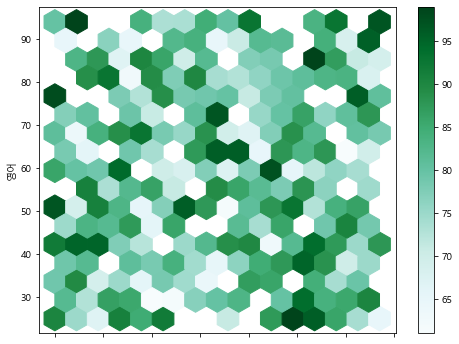

In [ ]:
import numpy as np
df.plot.hexbin(x= '국어', y = '영어',
               C = '역사',
               gridsize=15,
               figsize=(8,6))

ValueError: 'sring' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

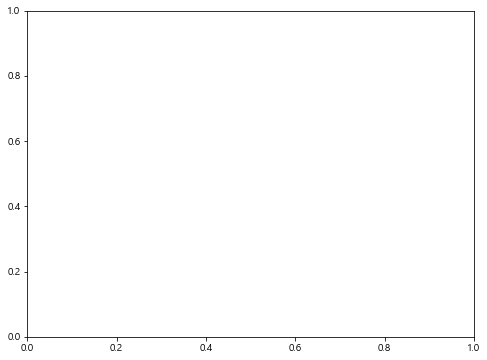

In [ ]:
import numpy as np
df.plot.hexbin(x= '국어', y = '영어',
               C = '역사',
               gridsize=15,
               cmap = 'sring',
               figsize=(8,6))

## Scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B87A9B7248>,
      dtype=object)

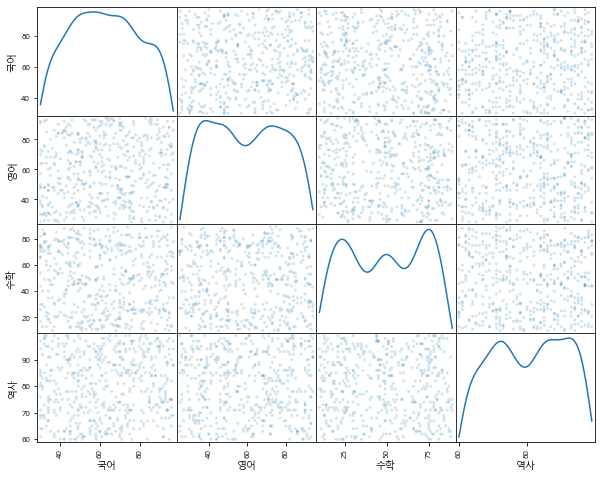

In [ ]:
from pandas.plotting import scatter_matrix
data = df[['국어', '영어', '수학', '역사']]
scatter_matrix(data, alpha = 0.2, figsize=(10, 8), diagonal = 'kde')

## KDE or density plot

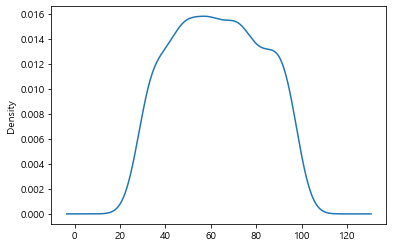

In [ ]:
df['국어'].plot.kde()

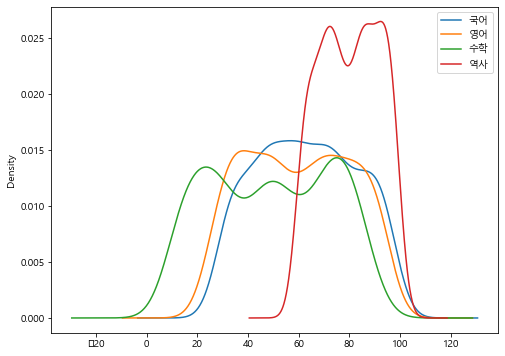

In [ ]:
data.plot.kde(figsize = (8, 6))

## Parallel_coordinates
This is a good way of showing multi-dimensional data. It clearly shows the clusters if there are any.

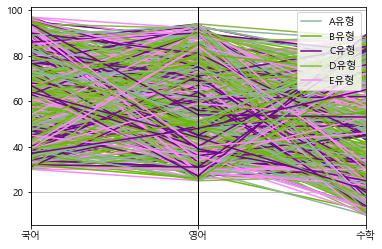

In [ ]:
from pandas.plotting import parallel_coordinates
data = df[['시험명', '국어', '영어', '수학']]
parallel_coordinates(data, '시험명')

In [ ]:
from sklearn.datasets import load_iris, load_wine
wine = load_wine()
wine_data = np.hstack((wine.data, wine.target.reshape(-1,1)))

wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names+ ['WineCategory'])
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineCategory
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
wine_df.WineCategory.value_counts()

1.0    71
0.0    59
2.0    48
Name: WineCategory, dtype: int64

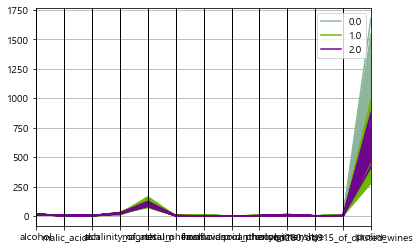

In [ ]:
parallel_coordinates(wine_df, 'WineCategory')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wine_df.iloc[:,:-1])
wine_df.iloc[:,:-1] = scaler.transform(wine_df.iloc[:,:-1])

StandardScaler()

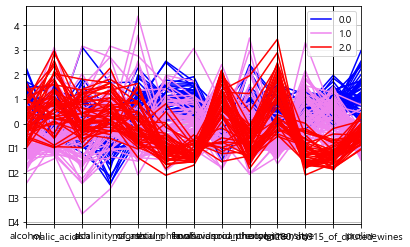

In [ ]:
parallel_coordinates(wine_df, 'WineCategory', color=['blue', 'violet', 'red'])

## Fourier graph

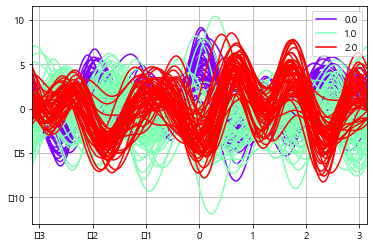

In [ ]:
from pandas.plotting import andrews_curves
andrews_curves(wine_df, 'WineCategory',colormap='rainbow')
plt.show()

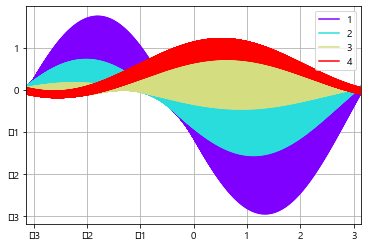

In [ ]:
# case 1
x = np.linspace(-1, 1, 1000)
df = pd.DataFrame({'A': np.sin(x**2)/x, 'B': np.sin(x)*np.exp(-x),
                   'C': np.cos(x)*x, 'D': 1})
df.iloc[200:400, 3:4] = 2
df.iloc[400:700, 3:4] = 3
df.iloc[700:1000, 3:4] = 4
andrews_curves(df, "D",colormap='rainbow')
plt.show()

## Bootstrap_plot
20개 표본(size)을 resampling을 총 100회(samples)를 한 통계량 (중심극한정리 증명)

In [ ]:
df

,일자,이름,국어,영어,수학,역사,시험명,출석
0,2001-04-01 20:21:00,수철,76,81,26,71,A유형,True
1,2001-04-02 20:21:00,수철,93,48,81,84,B유형,True
2,2001-04-03 20:21:00,수철,30,64,26,84,C유형,False
3,2001-04-04 20:21:00,철수,74,72,46,65,D유형,True
4,2001-04-05 20:21:00,영희,42,26,79,91,E유형,True
...,...,...,...,...,...,...,...,...
495,2002-08-09 20:21:00,희영,83,51,81,85,A유형,True
496,2002-08-10 20:21:00,희영,39,51,71,96,B유형,True
497,2002-08-11 20:21:00,수철,37,48,65,74,C유형,True
498,2002-08-12 20:21:00,영희,73,82,12,71,D유형,False


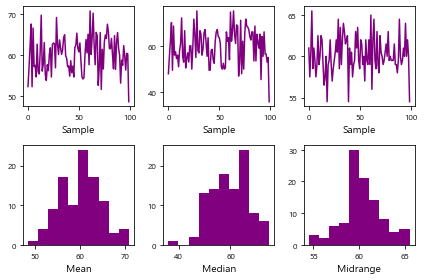

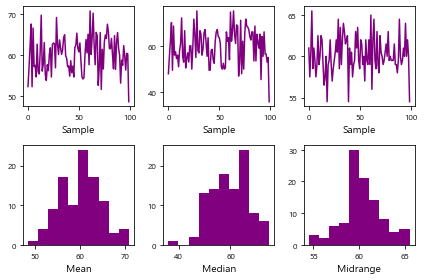

In [ ]:
from pandas.plotting import bootstrap_plot
bootstrap_plot(df['영어'], size=20, samples=100, color='purple');plt.show()

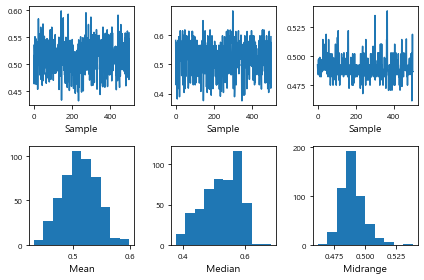

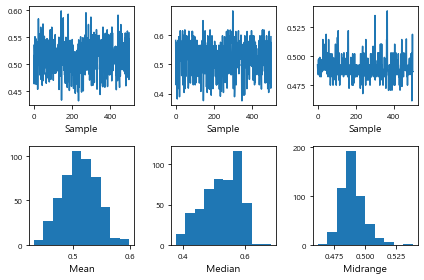

In [ ]:
s = pd.Series(np.random.uniform(size=100))
pd.plotting.bootstrap_plot(s)